<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter3/simann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.11


# Example 3.5
## Import modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

1.19.5


## Set random seed

In [ ]:
np.random.seed(9)

## Original Program

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


minimizer = 1.367, minimum = -0.958


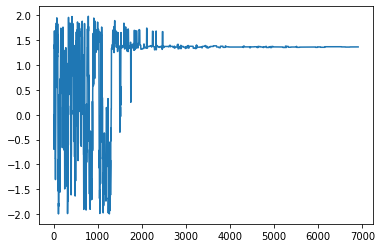

In [ ]:
def wiggly(x):
    y = -np.exp(x**2/100)*np.sin(13*x-x**4)**5*np.sin(1-3*x**2)**2
    ind = np.vstack((np.argwhere(x<-2),np.argwhere(x>2)))
    y[ind]=float('inf')
    return y
    

S = wiggly

beta = 0.999
sig = 0.5
T=1
x= np.array([0])
xx=[]
Sx=S(x)
while T>10**(-3):
    T=beta*T
    y = x+sig*np.random.randn()
    Sy = S(y)
    alpha = np.amin((np.exp(-(Sy-Sx)/T),1))
    if np.random.uniform()<alpha:
        x=y
        Sx=Sy
    xx=np.hstack((xx,x))
print('minimizer = {:3.3f}, minimum = {:3.3f}'.format(x[0],Sx[0]))
plt.plot(xx)
plt.show()

## Reproduce Figure 3.10

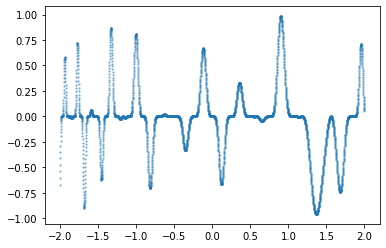

In [ ]:
xx = np.arange(-2,2,0.001)
yy = wiggly(xx)
plt.scatter(xx, yy, alpha =0.4,s =2)
plt.show()

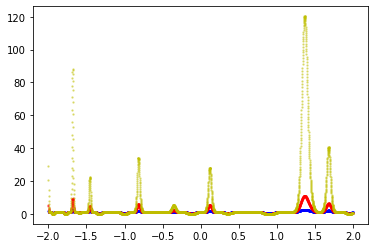

In [ ]:
yy_1 = np.maximum(np.exp(-yy), 0)
yy_2 = np.maximum(np.exp(-yy/0.4), 0)
yy_3 = np.maximum(np.exp(-yy/0.2), 0)
plt.scatter(xx, yy_1, alpha =0.4,s =2, color='b')
plt.scatter(xx, yy_2, alpha =0.4,s =2, color='r')
plt.scatter(xx, yy_3, alpha =0.4,s =2, color='y')
plt.show()